### Analyse differences in results after changing original Fortran codes to make them resemble more the equations in the underlying publication

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import pandas as pd
from collections import defaultdict

In [3]:
def load_test_results(fn):
    with open(fn) as f:
        # skip header lines
        for i in range(4):
            f.readline()
        # now read until the next empty line
        data = defaultdict(list)
        dates = []
        while True:
            l = f.readline()
            if l == '\n':
                break
            yr, mon, day, temp, stfl, pwr, evfl, fmelt, inf, drm, mmp,\
                fmg, fcl, o18, o18m, o18f, h2, h22, m = l.split()
            dates.append(np.datetime64('{}-{:02d}-{:02d}'.format(yr, int(mon), int(day))))
            data['t'].append(float(temp))
            data['steam'].append(float(stfl))
            data['pwr'].append(float(pwr))
            data['evfl'].append(float(evfl))
            data['fmelt'].append(float(fmelt))
            data['inf'].append(float(inf))
            data['fmg'].append(float(fmg))
            data['fcl'].append(float(fcl))
            data['mass'].append(float(m))

    return pd.DataFrame(data, index=dates)


In [44]:
df1 = load_test_results('data/LAKEOUTm_old.DAT')
df2 = load_test_results('data/LAKEOUTm.DAT')

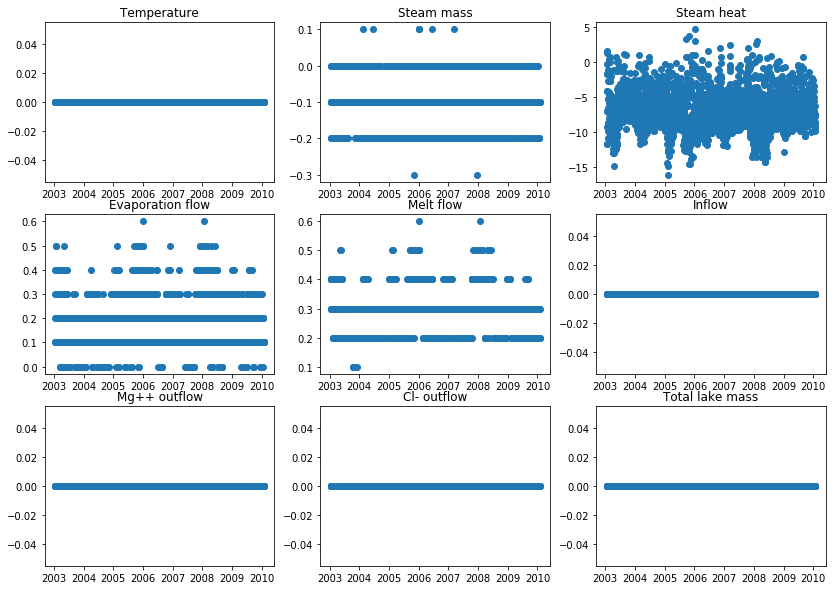

In [45]:
dates = date2num(df1.index.to_pydatetime())
plt.figure(figsize=(14,10))
plt.subplot(331)
diff = df1['t']-df2['t']
plt.plot_date(dates,diff)
plt.title('Temperature')
plt.subplot(332)
diff = df1['steam']-df2['steam']
plt.plot_date(dates,diff)
plt.title('Steam mass')
plt.subplot(333)
diff = df1['pwr']-df2['pwr']
plt.plot_date(dates,diff)
plt.title('Steam heat')
plt.subplot(334)
diff = df1['evfl']-df2['evfl']
plt.plot_date(dates,diff)
plt.title('Evaporation flow')
plt.subplot(335)
diff = df1['fmelt']-df2['fmelt']
plt.plot_date(dates,diff)
plt.title('Melt flow')
plt.subplot(336)
diff = df1['inf']-df2['inf']
plt.plot_date(dates,diff)
plt.title('Inflow')
plt.subplot(337)
diff = df1['fmg']-df2['fmg']
plt.plot_date(dates,diff)
plt.title('Mg++ outflow')
plt.subplot(338)
diff = df1['fcl']-df2['fcl']
plt.plot_date(dates,diff)
plt.title('Cl- outflow')
plt.subplot(339)
diff = df1['mass']-df2['mass']
plt.plot_date(dates,diff)
plt.title('Total lake mass')